In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("NBA21.csv")

In [3]:
df.head()

,NOMBRE,POS,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FTA,FT%,REB,AST,STL,BLK,TO,DD2,TD3,PER
0,Stephen CurryLEB/GS,BA,63,34.2,32.0,10.4,21.7,48.2,5.3,12.7,...,6.3,91.6,5.5,5.8,1.2,0.1,3.4,8,0,26.37
1,Bradley BealDUR/WSH,E,60,35.8,31.3,11.2,23.0,48.5,2.2,6.2,...,7.7,88.9,4.7,4.4,1.2,0.4,3.1,4,0,22.81
2,Damian LillardPOR/LEB,BA,67,35.8,28.8,9.0,19.9,45.1,4.1,10.5,...,7.2,92.8,4.2,7.5,0.9,0.3,3.0,16,0,25.65
3,Joel EmbiidPHI,C,51,31.1,28.5,9.0,17.6,51.3,1.1,3.0,...,10.7,85.9,10.6,2.8,1.0,1.4,3.1,31,0,30.32
4,Giannis AntetokounmpoMIL/LEB,AP,61,33.0,28.1,10.3,18.0,56.9,1.1,3.6,...,9.5,68.5,11.0,5.9,1.2,1.2,3.4,41,7,29.24


In [4]:
df.shape

(500, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NOMBRE  500 non-null    object 
 1   POS     500 non-null    object 
 2   GP      500 non-null    int64  
 3   MIN     500 non-null    float64
 4   PTS     500 non-null    float64
 5   FGM     500 non-null    float64
 6   FGA     500 non-null    float64
 7   FG%     500 non-null    float64
 8   3PM     500 non-null    float64
 9   3PA     500 non-null    float64
 10  3P%     500 non-null    float64
 11  FTM     500 non-null    float64
 12  FTA     500 non-null    float64
 13  FT%     500 non-null    float64
 14  REB     500 non-null    float64
 15  AST     500 non-null    float64
 16  STL     500 non-null    float64
 17  BLK     500 non-null    float64
 18  TO      500 non-null    float64
 19  DD2     500 non-null    int64  
 20  TD3     500 non-null    int64  
 21  PER     500 non-null    float64
dtypes:

In [6]:
columnas=["NOMBRE","POS","GP", "MIN","PTS", "FGM", "FGA", "FG%", "3PM", "3PA", "3P%", "FTA", "FTM", "FT%", "REB", "AST", "STL", "BLK", "TO", "DD2", "TD3", "PER"]

In [7]:
df.describe(include="all")

,NOMBRE,POS,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FTA,FT%,REB,AST,STL,BLK,TO,DD2,TD3,PER
count,500,500,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
unique,500,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Rayjon TuckerPHI,SG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,45.230000,20.983400,9.578800,3.525000,7.632400,46.137600,1.075800,2.994800,...,1.875000,75.108400,3.851000,2.118000,0.656400,0.439200,1.147400,3.696000,0.284000,13.901920
std,NaN,NaN,19.277977,8.630792,6.315622,2.275027,4.706001,8.361479,0.900231,2.265612,...,1.645457,15.325002,2.348755,1.872059,0.373494,0.412897,0.818972,8.390016,2.112883,5.229676
min,NaN,NaN,1.000000,3.000000,1.700000,0.500000,1.100000,23.100000,0.000000,0.000000,...,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.860000
25%,NaN,NaN,32.000000,14.500000,4.900000,1.800000,3.900000,41.100000,0.300000,1.300000,...,0.800000,69.175000,2.200000,0.800000,0.400000,0.200000,0.600000,0.000000,0.000000,10.577500
50%,NaN,NaN,48.500000,20.900000,7.750000,2.950000,6.500000,44.800000,0.900000,2.500000,...,1.400000,77.800000,3.400000,1.500000,0.600000,0.300000,0.900000,0.000000,0.000000,13.040000
75%,NaN,NaN,61.000000,28.400000,12.900000,4.700000,10.100000,50.000000,1.700000,4.425000,...,2.400000,84.500000,4.900000,2.800000,0.900000,0.600000,1.500000,3.000000,0.000000,16.705000


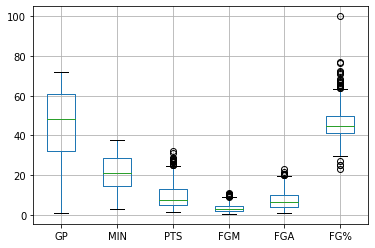

In [8]:
muestra = df.boxplot(column=['GP', 'MIN', 'PTS', 'FGM', 'FGA','FG%'])

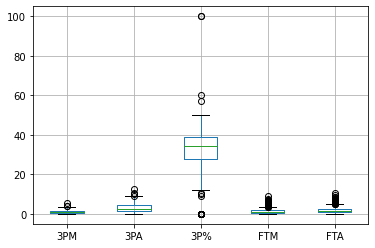

In [9]:
muestra2 = df.boxplot(column=['3PM','3PA','3P%','FTM','FTA'])

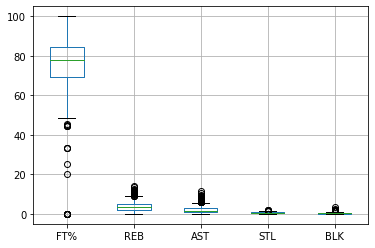

In [10]:
muestra3 = df.boxplot(column=['FT%','REB','AST','STL','BLK'])

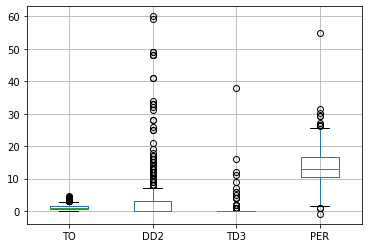

In [11]:
muestra4 = df.boxplot(column=['TO','DD2','TD3','PER'])

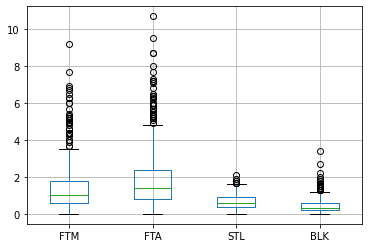

In [12]:
muestra5 = df.boxplot(column=['FTM','FTA','STL','BLK'])

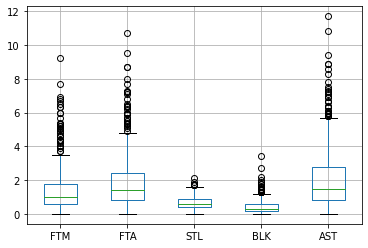

In [13]:
diagrama = df.boxplot(column=['FTM','FTA','STL','BLK','AST'])


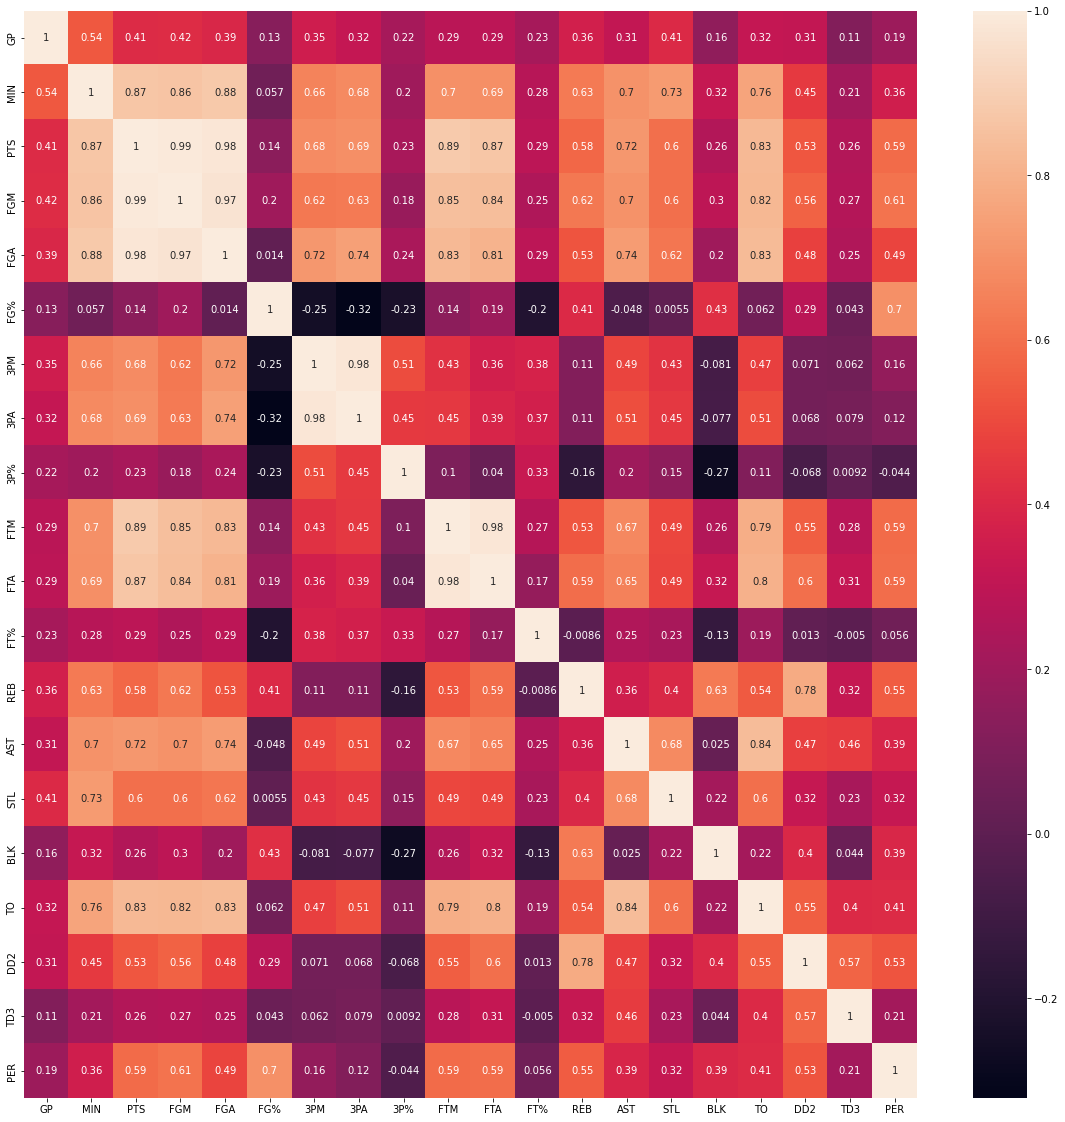

In [14]:
matriz = df.corr()
figure = plt.figure(figsize = (20,20))
sns.heatmap(matriz, annot=True)
plt.show()

In [15]:
df.corr().loc["PER"].abs().sort_values(ascending=False)

PER    1.000000
FG%    0.699922
FGM    0.612917
FTA    0.593480
PTS    0.590897
FTM    0.588410
REB    0.548701
DD2    0.529712
FGA    0.487055
TO     0.409661
BLK    0.393358
AST    0.387379
MIN    0.355821
STL    0.321492
TD3    0.212463
GP     0.194555
3PM    0.164899
3PA    0.116820
FT%    0.056254
3P%    0.043753
Name: PER, dtype: float64

In [16]:
LabelEncoder = LabelEncoder()

In [17]:
LabelEncoder.fit(df["PER"])

LabelEncoder()

In [18]:
df["PER"]= LabelEncoder.transform(df["PER"])

In [19]:
df["PER"].value_counts()

103    4
245    4
161    3
209    3
99     3
      ..
150    1
149    1
148    1
147    1
424    1
Name: PER, Length: 425, dtype: int64

In [20]:
df_train,df_test =train_test_split(df,train_size= 0.8, test_size=0.2)

In [21]:
print(len(df_train))
print(len(df_test))

400
100


In [22]:
pipeline_nba= Pipeline([("arbol_nba", DecisionTreeClassifier())])

In [23]:
profun_arbol={"arbol__max_depth":[2,3,4,5]}

In [27]:
gs_arbol= GridSearchCV (pipeline_nba, param_grid = profun_arbol, cv=4, scoring ="accuracy",verbose=5)

In [28]:
gs_arbol

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('arbol_nba',
                                        DecisionTreeClassifier())]),
             param_grid={'arbol__max_depth': [2, 3, 4, 5]}, scoring='accuracy',
             verbose=5)

In [26]:
gs_arbol.fit(df_train[columnas],df_train["PER"])

Fitting 4 folds for each of 4 candidates, totalling 16 fits


/home/alvaro/miniconda3/envs/core/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


ValueError: Invalid parameter arbol for estimator Pipeline(steps=[('arbol_nba', DecisionTreeClassifier())]). Check the list of available parameters with `estimator.get_params().keys()`.